In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
# Read the data into python

In [258]:
data=pd.read_excel('iris-new.xls')

In [259]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [261]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [262]:
# Check for null values

In [263]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [264]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Pre-processing

In [265]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [266]:
#Filling missing values in 'SL','SW' and 'PL'column using their median

for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [267]:
#Checking for null values again

data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [268]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [269]:
X = data.drop(['Classification'],axis=1)
y = data['Classification']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Classification, dtype: object

In [270]:
X.dtypes

SL    float64
SW    float64
PL    float64
PW    float64
dtype: object

In [271]:
# Training the model

In [272]:
X=data.drop(['Classification'],axis=1)
y=data['Classification']

In [273]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y=label_en.fit_transform(y)

In [274]:
# Min max scaling

In [275]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))
X = min_max.fit_transform(X)

In [276]:
# Splitting the dataset

In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [278]:
# Show the results of the split
X_train.shape

(120, 4)

# 1. Logistic Regression Model

In [279]:
results_arr = {'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[]}

In [280]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [281]:
start_time=time.time()
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
end_time=time.time()

In [282]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)
fail_percent = cm[1][0]/(np.sum(cm))*100
time_taken = end_time - start_time
results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)

Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 2. KNN Model

Text(0, 0.5, 'accuracy')

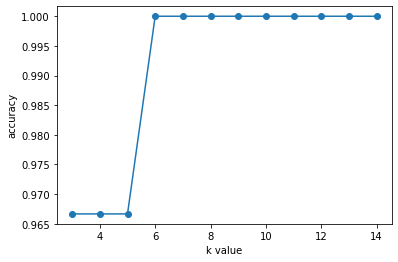

In [283]:
from sklearn.neighbors import KNeighborsClassifier
values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    values.append(acc)
plt.plot(neighbors,values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [284]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)

In [285]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)

Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 3. Decision Tree

In [286]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)

In [287]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)

Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 4. SVM

In [288]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
predictions=svm_linear.predict(X_test)

In [289]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)

Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 5. Random Forest

In [290]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

In [291]:
accuracy1 = accuracy_score(y_test,predictions)
precision1 = precision_score(y_test,predictions,average='micro')
recall1 = recall_score(y_test,predictions,average='micro')
f11 = f1_score(y_test,predictions,average='micro')
cm = confusion_matrix(y_test,predictions)

results_arr['Accuracy'].append(accuracy1)
results_arr['Precision'].append(precision1)
results_arr['Recall'].append(recall1)
results_arr['F1_Score'].append(f11)

print('Accuracy is',accuracy1)
print('precision is',precision1)
print('recall is',recall1)
print('f1_score is',f11)
print(cm)

Accuracy is 1.0
precision is 1.0
recall is 1.0
f1_score is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
